# Cross validation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

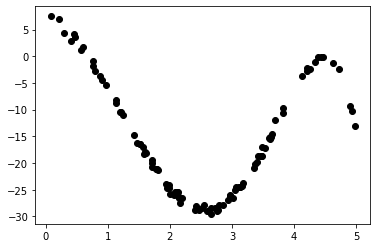

In [6]:
np.random.seed(123)
f = lambda x: ((-0.7*x-1)*(0.1*x**2-2)**2*(3*x-2)) 
x = stats.uniform(0,5).rvs(100)
y = f(x) + stats.norm(0,0.5).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Utworzenie listy modeli

In [7]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR7', make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression()) ))
models.append(('PR8', make_pipeline(PolynomialFeatures(8), linear_model.LinearRegression()) ))
models.append(('PR9', make_pipeline(PolynomialFeatures(9), linear_model.LinearRegression()) ))
models.append(('PR10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
# evaluate each model in turn


In [27]:
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = 'neg_mean_absolute_error' 
#scoring = 'r2'

In [28]:
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -9.180582 (1.463094)
PR2: -3.486806 (0.984427)
PR3: -3.545894 (0.955687)
PR4: -1.075648 (0.249993)
PR5: -0.415142 (0.108587)
PR6: -0.414913 (0.106426)
PR7: -0.422787 (0.107162)
PR8: -0.418938 (0.109399)
PR9: -0.438198 (0.108085)
PR10: -0.460053 (0.118093)


# Wizualne porównanie wyników

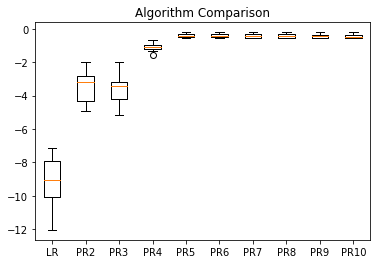

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax=plt.gca()
ax.set_xticklabels(names)
plt.show()

### Dobierz optymalny stopień wielomianu za pomocą metody GridSearchCV.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [30]:
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), linear_model.LinearRegression())

In [31]:
pipeline

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

param_grid ustawiamy jako słownik zawierający:
 - klucz: nazwę kroku następnie dwa "_" oraz nazwę parametru
 - wartość: listę (obiekt iterowalny) wartości które chcemy sprawdzić

In [32]:
grid = GridSearchCV(pipeline,
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7,8,9,10]},
                    cv=kfold,
                    scoring=scoring,
                    refit=False)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_score_)

{'polynomialfeatures__degree': 6}
-0.4149126393846677


# Zadanie 1
Zmień pipeline w taki sposób, aby zastosować regularyzację L2 i oprócz najlepszego stopnia wielominanu znaleźć rózniez nalepszy parametr alfa z następującego zbioru: 0.001,0.01, 0.1, 1, 10, 100

In [16]:
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), linear_model.Ridge())
grid = GridSearchCV(pipeline,
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7,8,9,10],
                               'ridge__alpha': [0.001,0.01, 0.1, 1, 10, 100]},
                    cv=kfold,
                    scoring='neg_mean_absolute_error',
                    refit=False)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_score_)

{'polynomialfeatures__degree': 6, 'ridge__alpha': 0.001}
-0.4185714374960024


# Zadanie 2
Dla podanych danych wykonaj 5-fold cross-validation dla regresji liniowej i wielomianowej o stopniach 2,3,4,5,10,15,20,25 oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

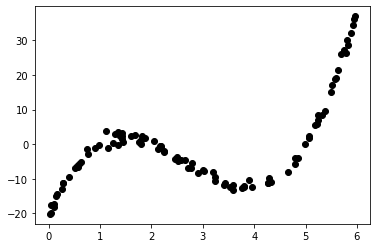

In [21]:
f1 = lambda x: 2*(x-2)*(x-1)*(x-5)
x = stats.uniform(0,6).rvs(100)
y = f1(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

In [22]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('PR15', make_pipeline(PolynomialFeatures(15), linear_model.LinearRegression()) ))
models.append(('PR20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))
# evaluate each model in turn
results = []
names = []

In [23]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [24]:
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -8.532111 (1.248286)
PR2: -7.989341 (0.437968)
PR3: -0.804505 (0.055792)
PR4: -0.798440 (0.053332)
PR5: -0.805677 (0.050674)
PR10: -0.851488 (0.045221)
PR15: -0.903888 (0.057354)
PR20: -1.603253 (0.276050)
PR25: -3.177021 (0.419215)


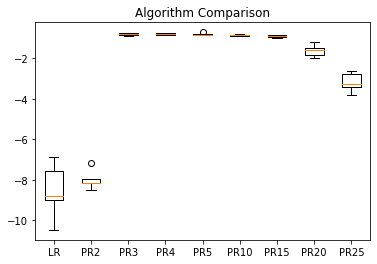

In [25]:
# boxplot algorithm comparison
fig = plt.figure()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax=plt.gca()
ax.set_xticklabels(names)
plt.show()

# Zadanie 3
Dla podanych danych znajdź model o najlepszych parametrach spośród modelu regresji liniowej i wielomianowej o stopniach 2,3,4,5,10,15,20,25 przy zastosowaniu regularyzacji L2 z parametrem alfa równym 0.0001, 0.001,0.01, 0.1, 1, 10, lub 100 przy zastosowaniu 5-fold cross-validation oraz podaj najlepszy uzyskany wynik.

In [26]:
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), linear_model.Ridge())
grid = GridSearchCV(pipeline,
                    param_grid={'polynomialfeatures__degree': [1, 2 ,3, 4, 5, 10, 15, 20, 25],
                               'ridge__alpha': [0.0001, 0.001,0.01, 0.1, 1, 10, 100]},
                    cv=kfold,
                    refit=False)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_score_)

{'polynomialfeatures__degree': 5, 'ridge__alpha': 0.0001}
0.9928759951098491
